In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===



We should return the matrix $D$ containing all pairwise distances between matrices $P \in \mathbb{R}^{p\times 2}$ and $Q \in \mathbb{R}^{q\times 2}$ (containing $(x,y)$ coordinates). $D_{i,j}$ is the Euclidean distance of the $i$th point in $P$ to the $j$-th point in $Q$.

The resulting matrix is then $p\times q$. We compute the Euclidean distance of two vectors $u,v$ as $d_{u,v} = \sqrt{(u_1-v_1)^2 + (u_2-v_2)^2}$.

In [9]:
def naive(p, q):
    def dist(u, v):
        d = u-v
        return np.sqrt(d[0]**2 + d[1]**2)
    
    nrow, ncol = p.shape[0], q.shape[0]
    D = np.zeros((nrow, ncol))
    for i in range(nrow):
        for j in range(ncol):
            D[i, j] = dist(p[i], q[j])
    return D

In [27]:
naivesol = naive(p, q)
naivesol

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

In [31]:
%timeit naive(p, q)

48.1 µs ± 1.45 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [11]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [23]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [51]:
def with_indices(p, q):
    irows, icols = np.indices((p.shape[0], q.shape[0]))
    diff = p[irows.ravel()] - q[icols.ravel()]
    dist_from_origin = np.sqrt(np.sum(np.power(diff, 2), axis=1))
    return dist_from_origin.reshape(p.shape[0], q.shape[0])

In [55]:
solindices = with_indices(p, q)
print(solindices)
np.all(solindices == naivesol)

[[0.60599073 0.93659449 0.91124856 0.59321356 0.27561751]
 [0.80746999 0.21102354 0.67268649 0.22495084 0.46534491]
 [0.35654215 0.75217493 0.57200052 0.49900068 0.23310825]
 [0.67281411 0.52407472 0.31520226 0.63212897 0.70277376]]


True

In [56]:
%timeit with_indices(p, q)

17.4 µs ± 89.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [59]:
print('{:.4} times faster on average on this test case'.format(48.1/17.4))

2.764 times faster on average on this test case


### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [60]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [61]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [62]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

27.3 ms ± 292 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
18.4 ms ± 68.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
367 µs ± 3.73 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.45 ms ± 65 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


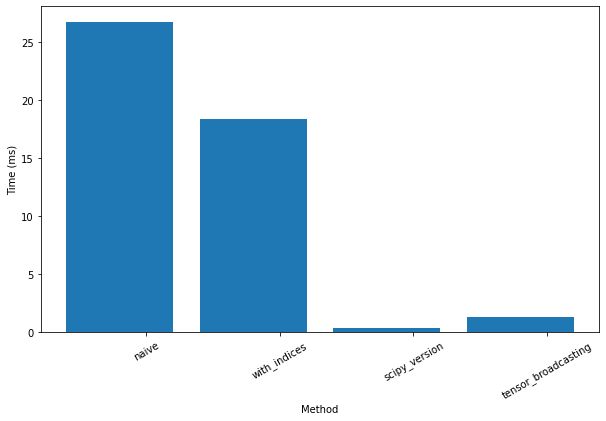

In [63]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()